In [1]:
import pickle
import numpy as np
import csv

In [2]:
#from sklearn.tree import DecisionTreeClassifier

filename = 'finalized_model_tree.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [3]:
unseen = []
with open('input_full.txt', newline='\n') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        unseen = unseen + [float(x) for x in row]

In [4]:
model_window = 30
estimation_window = 10
# Keep only windows multiples of 'estimation_window' seconds
unseen = unseen[:(len(unseen)//estimation_window)*estimation_window]
print(len(unseen),'values ( multiple of',estimation_window,')')

90 values ( multiple of 10 )


In [5]:
unseen_moving = []
for values in range(len(unseen)-model_window):
    unseen_moving.append(unseen[values:values+model_window])
print(len(unseen_moving),'instances ( of length',model_window,')')

60 instances ( of length 30 )


In [6]:
predictions_list = []
for measurement in unseen_moving:
    measurement = np.array(measurement).reshape(1, -1)
    prediction = loaded_model.predict(measurement)
    predictions_list.append(prediction)
print(len(predictions_list),'predictions')

60 predictions


In [26]:
summary = []
for index in range(0, len(predictions_list), estimation_window):
    window_str = [str(x[0]) for x in predictions_list[index:index+10]]
    relax_est = window_str.count('relax')/estimation_window*100
    cognit_est = window_str.count('cognit')/estimation_window*100
    emotio_est = window_str.count('emotio')/estimation_window*100
    summary.append({'time':str(index)+'-'+str(index+10),
                    'x':range(index,index+estimation_window),
                    'y':unseen[index:index+estimation_window], 
                    'relax':relax_est, 'cognit':cognit_est, 'emotio':emotio_est})
    print('Relax: {:.0f}% Cognit.Stress: {:.0f}% Emotion.Stress: {:.0f}%'.format(
        relax_est,cognit_est,emotio_est))

Relax: 30% Cognit.Stress: 70% Emotion.Stress: 0%
Relax: 0% Cognit.Stress: 60% Emotion.Stress: 40%
Relax: 0% Cognit.Stress: 20% Emotion.Stress: 80%
Relax: 0% Cognit.Stress: 0% Emotion.Stress: 100%
Relax: 0% Cognit.Stress: 0% Emotion.Stress: 100%
Relax: 0% Cognit.Stress: 0% Emotion.Stress: 100%


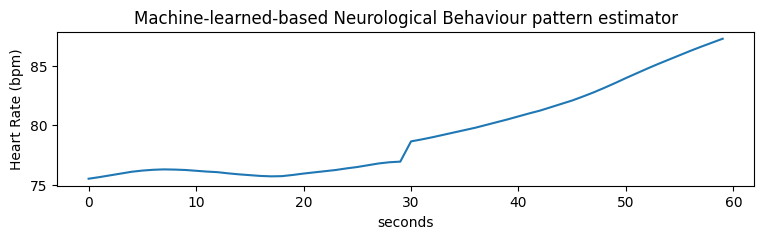

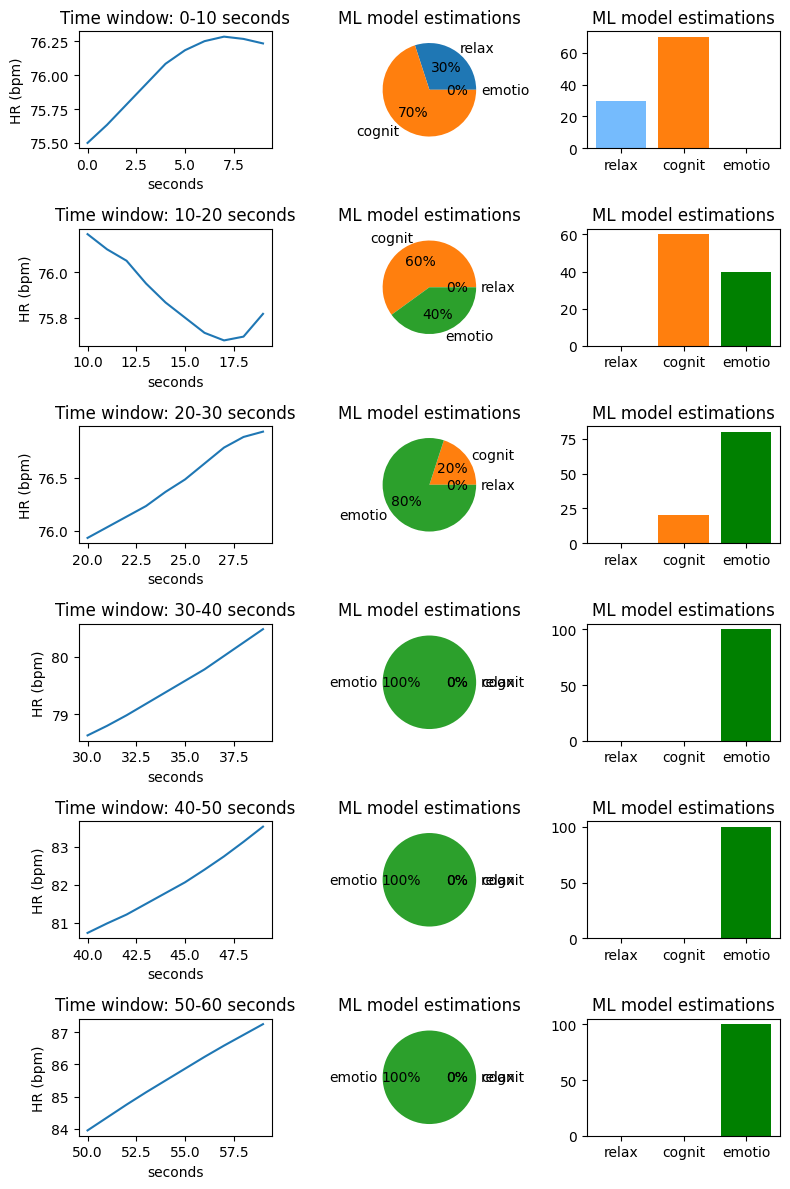

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,2))
plt.plot(unseen[:len(unseen)-model_window])
plt.xlabel('seconds')
plt.ylabel('Heart Rate (bpm)')
plt.title('Machine-learned-based Neurological Behaviour pattern estimator')
plt.show();

rows = len(predictions_list) // estimation_window
fig = plt.figure(figsize=(8,2*rows))
count = 0
for each in summary:
    count += 1
    plt.subplot(rows, 3, count)
    plt.plot(each['x'],each['y'])
    plt.title('Time window: {} seconds'.format(each['time']))
    plt.xlabel('seconds')
    plt.ylabel('HR (bpm)')
    count += 1
    plt.subplot(rows, 3, count)
    plt.pie([each['relax'],each['cognit'],each['emotio']],labels=['relax','cognit','emotio'],autopct='%1.0f%%')
    plt.title('ML model estimations')
    count += 1
    plt.subplot(rows, 3, count)
    plt.bar(['relax','cognit','emotio'],[each['relax'],each['cognit'],each['emotio']],color=['b','tab:orange','g'])
    plt.title('ML model estimations')
plt.tight_layout()
plt.show();